# Survival Outcome of a Passenger onboard the Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [23]:
v= VarianceThreshold(threshold=0)

In [4]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

### Finding Missing Data

<AxesSubplot:>

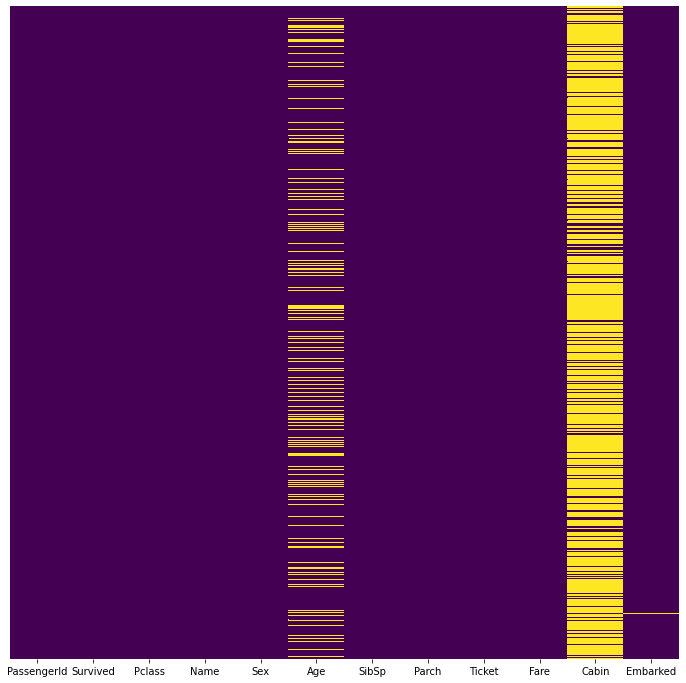

In [5]:
plt.figure(figsize=(12,12))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

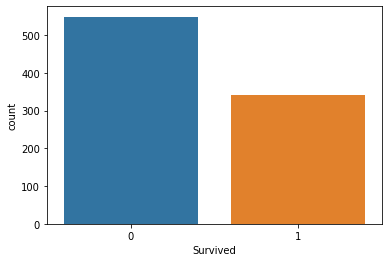

In [5]:
sns.countplot(x='Survived', data=titanic)

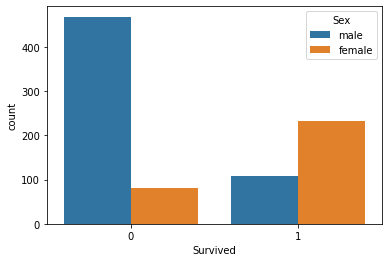

In [6]:
sns.countplot(x='Survived',hue='Sex' , data=titanic)

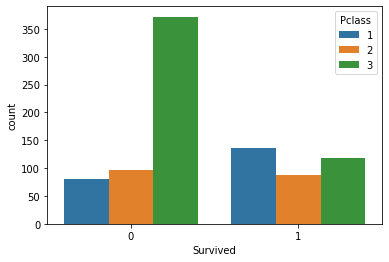

In [7]:
sns.countplot(x='Survived',hue='Pclass' , data=titanic)

# Descriptive Statistics

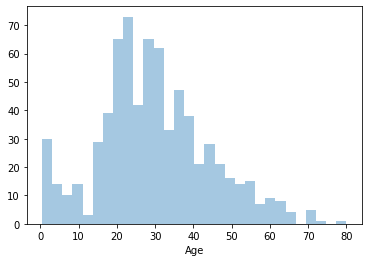

In [8]:
sns.distplot(titanic['Age'].dropna(), kde=False, bins=30)

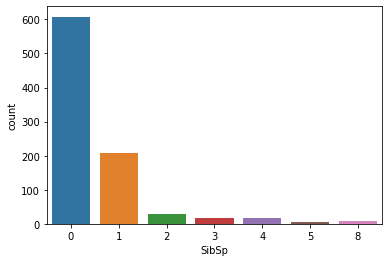

In [9]:
sns.countplot(x='SibSp', data=titanic)

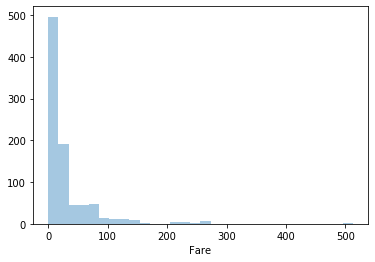

In [10]:
sns.distplot(titanic['Fare'].dropna(), kde=False, bins=30)

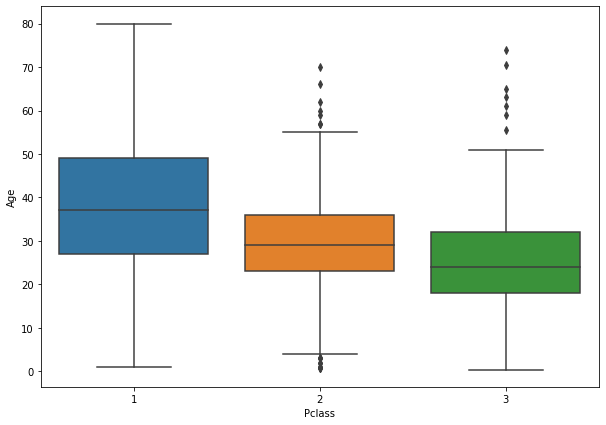

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=titanic)

In [6]:
titanic.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [7]:
def age_range(cols):
    age_map = [38,30,25]
    age, pclass = cols[0], cols[1]
    if pd.isnull(age):
        return age_map[int(pclass)-1]
    else:
        return age


In [8]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(age_range, axis=1)

In [9]:
titanic.drop('Cabin', axis=1, inplace=True)
titanic.dropna(inplace=True)

<AxesSubplot:>

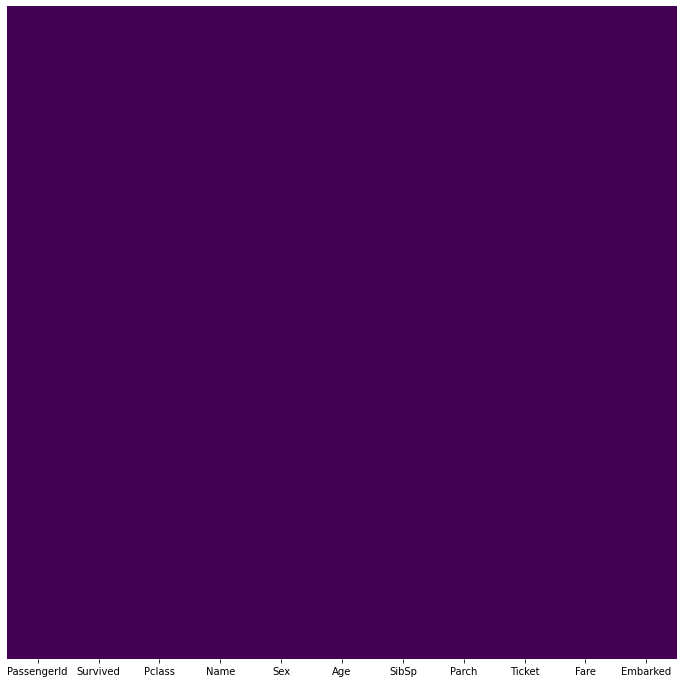

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
titanic[titanic.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


# Feature Engineering

In [12]:
gender = pd.get_dummies(titanic['Sex'], drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [13]:
embark = pd.get_dummies(titanic['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [14]:
sibsp = pd.get_dummies(titanic['SibSp'], prefix='SibSp')
sibsp.head()

,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [15]:
parch = pd.get_dummies(titanic['Parch'], prefix='Parch')
parch.head()

,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [16]:
titanic = titanic.drop(['PassengerId', 'Sex', 'Embarked', 'Name',
                        'Ticket', 'SibSp','Parch'], axis=1)

titanic = pd.concat([titanic, gender, embark, sibsp, parch], axis=1)
titanic.head()

,Survived,Pclass,Age,Fare,male,C,Q,S,SibSp_0,SibSp_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,3,22.0,7.2500,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,1,38.0,71.2833,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,7.9250,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,35.0,53.1000,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,3,35.0,8.0500,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
x = titanic.drop('Survived', axis=1)
y = titanic['Survived']

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [18]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluation

In [19]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       167
           1       0.78      0.74      0.76       100

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



In [20]:
print(accuracy_score(ytest, ypred))

0.8239700374531835
